In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [10]:
# df=pd.read_excel('standing_appdata.xlsx') 

Dataset for TRaining **Durting train uncomment**

In [59]:
 df=pd.read_csv('test_appdata.csv')

Dataset for Testing **Durting train comment**

In [60]:
df.head()

,timeElapsed,x,y,z,label
0,0,-0.76,7.08,8.41,Sitting
1,1,-1.41,6.68,8.55,Sitting
2,2,-2.17,6.10,9.31,Sitting
3,3,-1.06,6.08,9.80,Sitting
4,4,-0.40,6.29,8.41,Sitting


In [61]:
df.shape

(31048, 5)

In [62]:
df['label'].unique()

array(['Sitting', 'Standing', 'Walking'], dtype=object)

In [63]:
df['label'].value_counts()

Walking     13835
Standing     8701
Sitting      8512
Name: label, dtype: int64

## Plot Axies of Accelerometer Dataset 

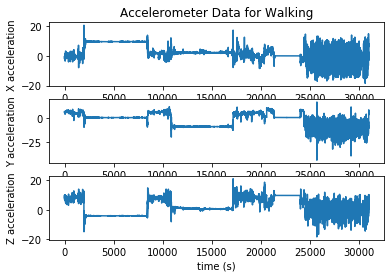

<Figure size 720x720 with 0 Axes>

In [64]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [65]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values


In [66]:
def Filter (Data):
        a=0.12  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [67]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

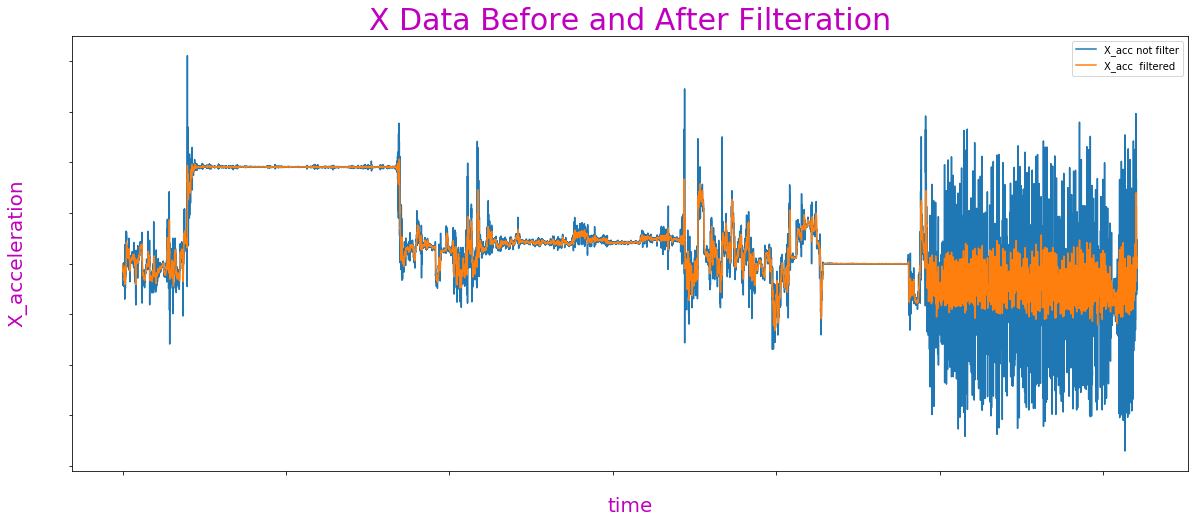

In [68]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('X_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


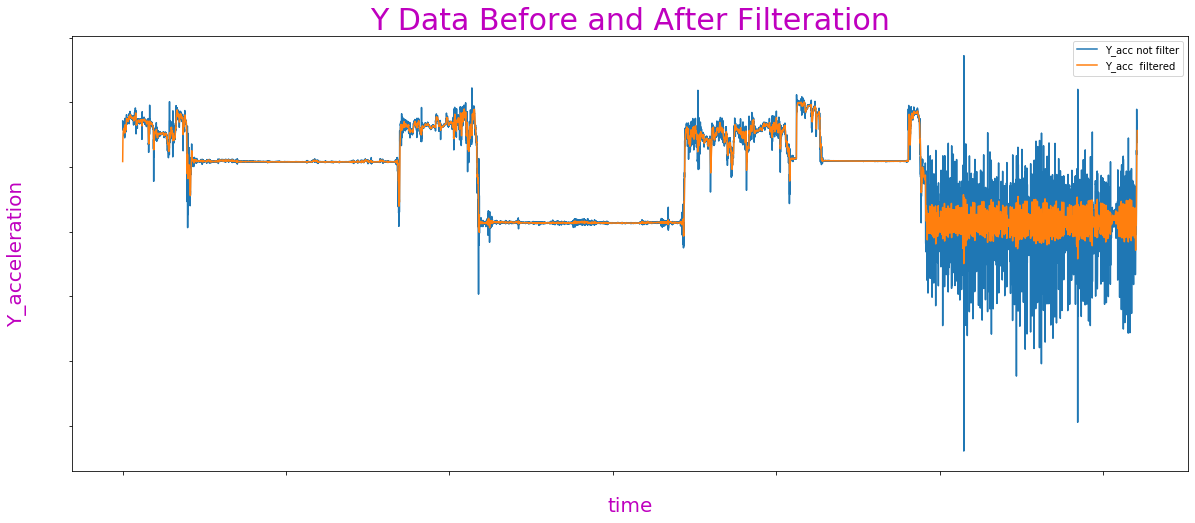

In [69]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Y_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

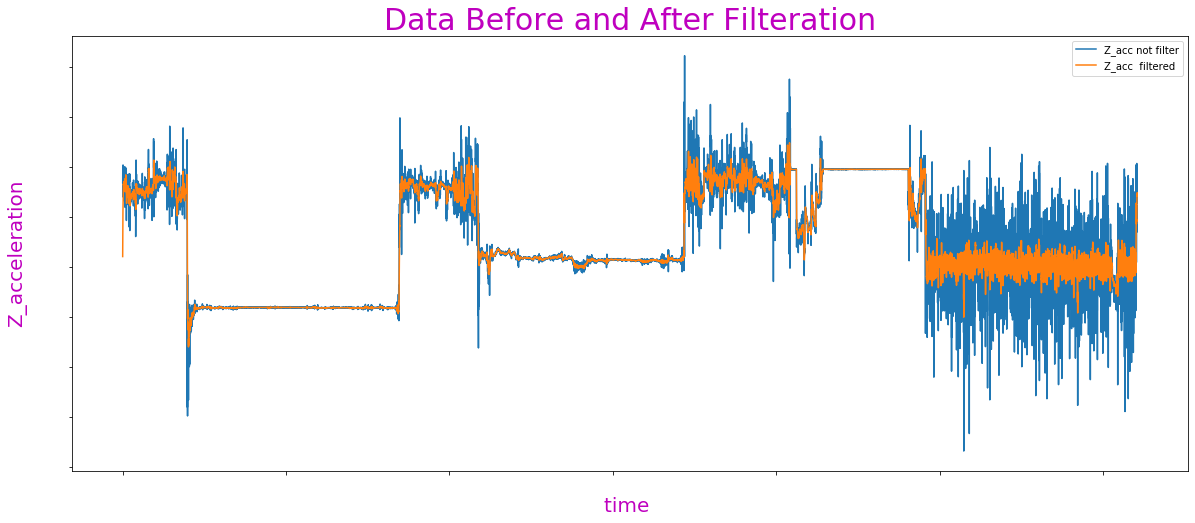

In [70]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Z_acceleration',color='m',fontsize=20)
plt.xlabel('time ',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [71]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 7)
Y_smoothed = gaussian_filter1d(Y_filtered, 7)
Z_smoothed = gaussian_filter1d(Z_filtered, 7)


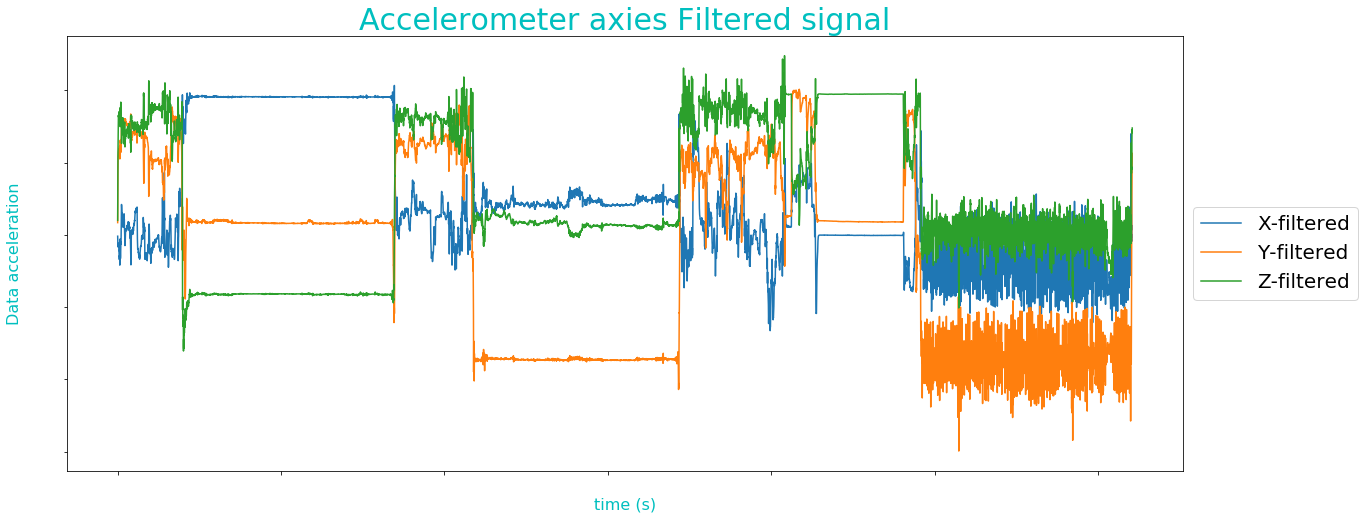

In [72]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='c',fontsize=30)
plt.ylabel('Data acceleration',color='c',fontsize=16)
plt.xlabel('time (s)',color='c',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

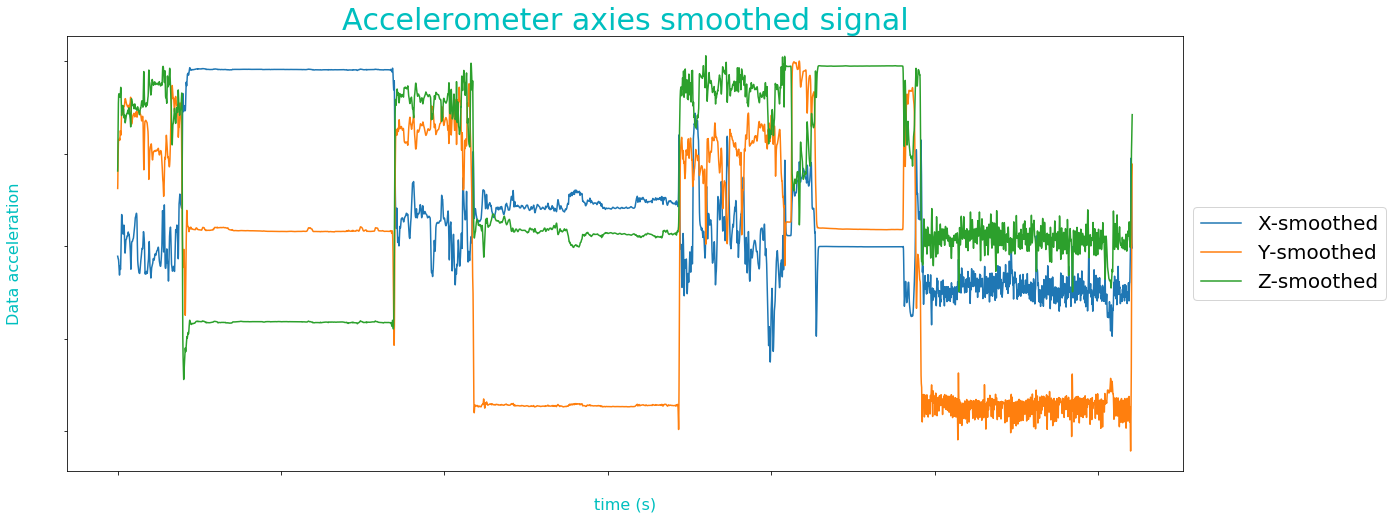

In [73]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='c',fontsize=30)
plt.ylabel('Data acceleration',color='c',fontsize=16)
plt.xlabel('time (s)',color='c',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

In [74]:
df['X_smoothed']=X_smoothed
df['Y_smoothed']=Y_smoothed
df['Z_smoothed']=Z_smoothed
df.head()

,timeElapsed,x,y,z,label,X_smoothed,Y_smoothed,Z_smoothed
0,0,-0.76,7.08,8.41,Sitting,-0.542961,3.119868,4.064745
1,1,-1.41,6.68,8.55,Sitting,-0.546370,3.150910,4.105800
2,2,-2.17,6.10,9.31,Sitting,-0.552986,3.211762,4.186435
3,3,-1.06,6.08,9.80,Sitting,-0.562421,3.300048,4.303810
4,4,-0.40,6.29,8.41,Sitting,-0.574138,3.412419,4.453914


### Segmenation Process

In [75]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['X_smoothed'].values[i: i + 100]
    ys = df['Y_smoothed'].values[i: i + 100]
    zs = df['Z_smoothed'].values[i: i + 100]
    label = stats.mode(df['label'][i: i + 50])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [76]:
X_train.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,avg_result_accl,sma
0,-1.032730,5.546461,7.672227,0.325850,0.758230,1.144871,0.286685,0.523588,0.814232,-1.559355,...,-1.967477,-2.026140,-1.287227,2.944791,2.876389,1.172710,31.338140,60.173798,9.527974,14.251418
1,-0.007724,6.497390,7.871817,1.273704,0.616585,0.456368,1.211719,0.573844,0.413056,-1.559355,...,0.286261,-0.256597,-1.757826,-1.616851,-1.233227,1.622381,42.596254,62.173769,10.313175,15.581389
2,1.037656,7.178006,7.431451,0.431931,0.348995,0.295207,0.336473,0.232305,0.203127,-0.326634,...,-1.669020,1.162976,0.629756,2.486182,2.203695,1.263295,51.645563,55.313605,10.402387,15.659834
3,0.498816,7.579137,7.106773,0.488481,0.298808,0.299406,0.434759,0.253136,0.264067,-0.372876,...,-0.143671,0.174908,-1.194911,-1.375587,-1.322337,0.487431,57.532612,50.595862,10.421737,15.288514
4,0.281481,7.753702,6.991785,0.327542,0.142464,0.174302,0.263928,0.125943,0.151774,-0.372876,...,0.181259,-0.468855,-0.430370,-1.361985,-1.111653,0.186515,60.140187,48.915443,10.451777,15.130757


In [77]:
df_New=X_train


In [78]:
df_New.to_csv('Features.csv',index=False)

In [79]:
X=X_train
y=np.array(train_labels)

In [80]:
X.shape

(619, 50)

In [81]:
y.shape

(619,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [39]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (2954, 50)
X_test_shape ----> (1266, 50)
Y_train_shape ----> (2954,)
Y_test_shape ----> (1266,)


During train uncomment this cell

### Preprocessimg label data and feature

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# y_labeled=le.fit_transform(y_train)
# y_labeled_test=le.transform(y_test)
# Y_all=le.transform(y)
y_independent=le.fit_transform(y)
y_independent.shape

(619,)

In [41]:
z=le.inverse_transform(np.unique(y_labeled_test))


In [42]:
z

array(['Downstairs', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype='<U10')

During train uncomment this line and change y to y_train

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# x_Scaler_train=sc.fit_transform(X_train)
# x_Scaler_test=sc.transform(X_test)
# X_all=sc.transform(X)
x_independent=sc.fit_transform(X)
x_independent.shape

(619, 50)

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [44]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())




Cross validation for train data SVC is :  0.678709345637861


During train uncomment this cell

Confusion matrix is :
  [[ 72   0   3  23  31]
 [  0 101   2   0  18]
 [  7   1 208   7  22]
 [  4   0   2 136  35]
 [ 13   0   9  10 562]]


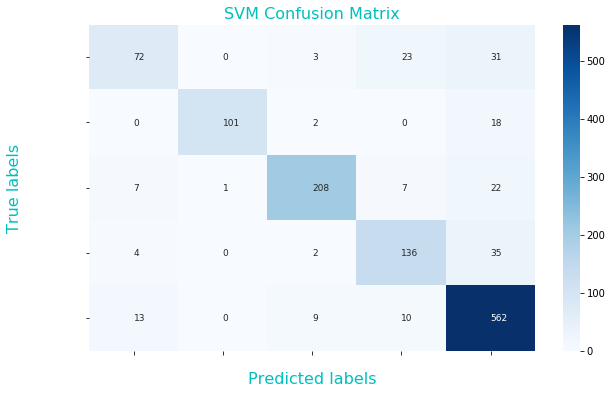

In [45]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [46]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
k = acc.index(max(acc) )      
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8617693522906793 at K = 4


In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN ,  X_all , Y_all, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())



# cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.607165183363141


During train uncomment this cell

Confusion matrix is :
  [[ 98   3   3  15  10]
 [  4 107   3   3   4]
 [ 10   5 211   5  14]
 [ 24   6   2 135  10]
 [ 26   5  13  17 533]]


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

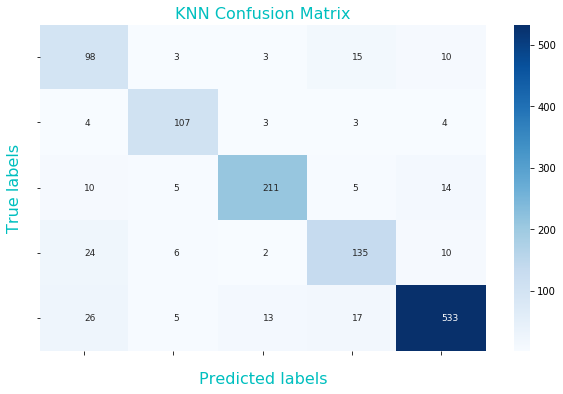

In [48]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('KNN Confusion Matrix',fontsize=16,color='c') 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)



During train uncomment this cell

### Using Random forest Classifier

In [49]:
acc = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,50):
    neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
K= acc.index(max(acc) )      
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8894154818325435 at K = 47


In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = K, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , X_all , Y_all, cv = 10)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
# cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.7803317535545023


During train uncomment this cell

Confusion matrix is :
  [[ 99   0   2  16  12]
 [  3 112   4   1   1]
 [  9   1 219   7   9]
 [ 15   6   0 145  11]
 [ 26   5   7  11 545]]


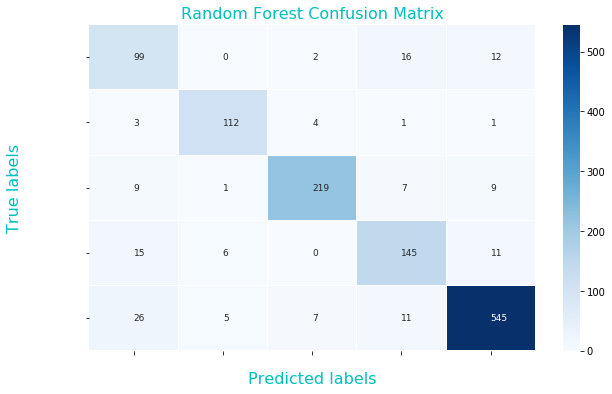

In [51]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True,linewidths = 0.1, fmt='d', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Random Forest Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [52]:
acc = []
from sklearn import tree
from sklearn import metrics
for i in range(1,50):
    neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
K= acc.index(max(acc))   
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8467614533965245 at K = 9


In [53]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = K,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT ,  X_all , Y_all, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
# cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.5526689858975797


During train uncomment this cell

Confusion matrix is :
  [[ 66   1   2  20  40]
 [  0 105   2   2  12]
 [  2   0 209   6  28]
 [ 11   6   1 113  46]
 [  4   5   7  16 562]]


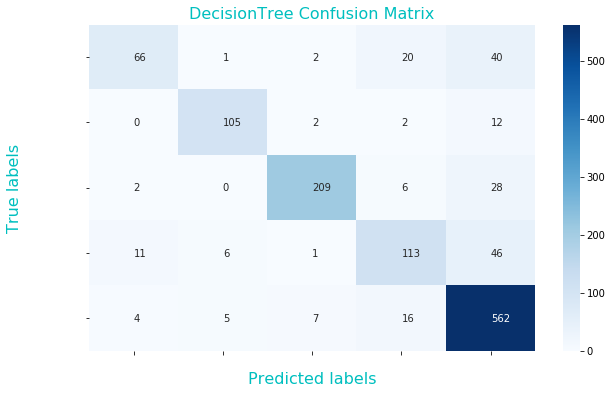

In [54]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 10}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('DecisionTree Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB ,  X_all , Y_all, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train.mean())



Cross validation for train data NB is :  0.5270157375420532


During train uncomment this cell

Confusion matrix is :
  [[ 49   0   9  42  29]
 [  4 101   4  12   0]
 [ 14   0 201  29   1]
 [  5   0   4 105  63]
 [ 34   2  57  67 434]]


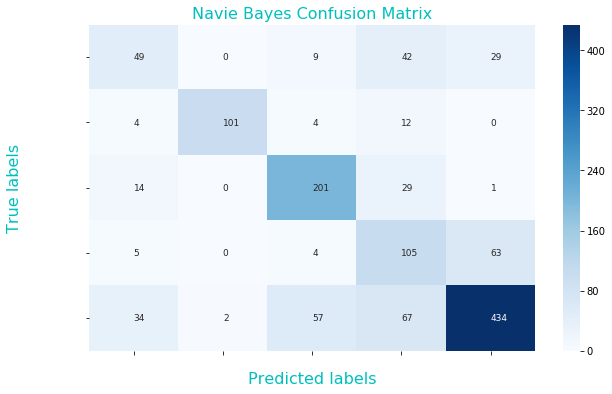

In [56]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Navie Bayes Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

Confusion matrix is :
  [[ 84   0   2  24  19]
 [  3 107   4   0   7]
 [  9   2 214   9  11]
 [  8   4   2 146  17]
 [ 17   3  11  20 543]]


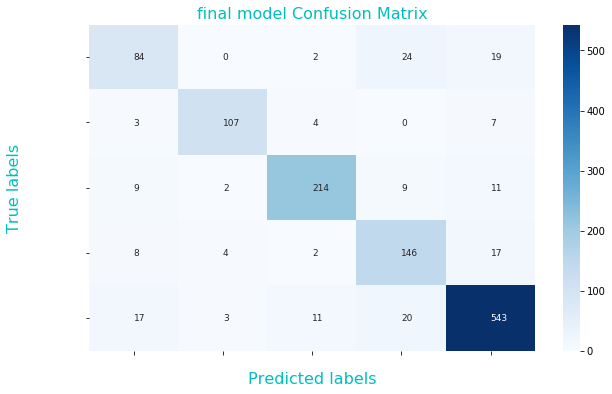

In [57]:
from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier(n_estimators=50, random_state=1)
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
dt = tree.DecisionTreeClassifier(max_depth = K,criterion = 'entropy',random_state=49)
svm = SVC(kernel = 'rbf')
nb = GaussianNB()
lr = LogisticRegression(multi_class='multinomial', random_state=1)
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('svm', svm), ('knn', knn),('lr',lr), ('rf', rf),('dt',dt),('nb',nb)], voting='hard')
final_model.fit(x_Scaler_train, y_labeled)
pred_final = final_model.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, pred_final)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('final model Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [58]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  
print('Accuracy of final model  --------->',round(accuracy_score(y_labeled_test, pred_final),2))  

Accuracy of SVC          ---------> 0.85
Accuracy of Desicion Tree---------> 0.83
Accuracy of Random forest---------> 0.88
Accuracy of KNN          ---------> 0.86
Accuracy of Navie Bayes  ---------> 0.7
Accuracy of final model  ---------> 0.86


In [346]:
# import joblib
 
# # Save the model as a pickle in a file
# joblib.dump(classifier_RF, 'RandomForest.pkl')
# joblib.dump(classifier_NB, 'naviebayes.pkl')
# joblib.dump(classifier_DT, 'descisiontree.pkl')
# joblib.dump(classifier_SVC, 'svc.pkl')
# joblib.dump(classifier_KNN, 'knn.pkl')


['knn.pkl']

In [410]:
# # Load the model from the file
# import joblib
# rf_from_joblib = joblib.load('RandomForest.pkl')
# nb_from_joblib = joblib.load('naviebayes.pkl')
# dt_from_joblib = joblib.load('descisiontree.pkl')
# svc_from_joblib = joblib.load('svc.pkl')
# knn_from_joblib = joblib.load('knn.pkl')
# y_prediction_test_SVC=svc_from_joblib.predict(x_independent)
# y_prediction_test_KNN=knn_from_joblib.predict(x_independent)
# y_prediction_test_RF=rf_from_joblib.predict(x_independent)
# y_prediction_test_DT=dt_from_joblib.predict(x_independent)
# y_prediction_test_NB=nb_from_joblib.predict(x_independent)


During train uncomment this cell

In [84]:
y_prediction_test_SVC=classifier_SVC.predict(x_independent)
y_prediction_test_KNN=classifier_KNN.predict(x_independent)
y_prediction_test_RF=classifier_RF.predict(x_independent)
y_prediction_test_DT=classifier_DT.predict(x_independent)
y_prediction_test_NB=classifier_NB.predict(x_independent)


During train **comment** this cell

In [85]:
from sklearn.metrics import  accuracy_score
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.01
Accuracy of Desicion Tree---------> 0.05
Accuracy of Random forest---------> 0.05
Accuracy of KNN          ---------> 0.12
Accuracy of Navie Bayes  ---------> 0.08


During train **comment** this cell